In [2]:
with open("data/MachineLearningRating_v3/MachineLearningRating_v3.txt", "r") as f:
    for i in range(10):
        print(f.readline())


UnderwrittenCoverID|PolicyID|TransactionMonth|IsVATRegistered|Citizenship|LegalType|Title|Language|Bank|AccountType|MaritalStatus|Gender|Country|Province|PostalCode|MainCrestaZone|SubCrestaZone|ItemType|mmcode|VehicleType|RegistrationYear|make|Model|Cylinders|cubiccapacity|kilowatts|bodytype|NumberOfDoors|VehicleIntroDate|CustomValueEstimate|AlarmImmobiliser|TrackingDevice|CapitalOutstanding|NewVehicle|WrittenOff|Rebuilt|Converted|CrossBorder|NumberOfVehiclesInFleet|SumInsured|TermFrequency|CalculatedPremiumPerTerm|ExcessSelected|CoverCategory|CoverType|CoverGroup|Section|Product|StatutoryClass|StatutoryRiskType|TotalPremium|TotalClaims

145249|12827|2015-03-01 00:00:00|True|  |Close Corporation|Mr|English|First National Bank|Current account|Not specified|Not specified|South Africa|Gauteng|1459|Rand East|Rand East|Mobility - Motor|44069150|Passenger Vehicle|2004|MERCEDES-BENZ|E 240|6|2597|130|S/D|4|6/2002|119300|Yes|No|119300|More than 6 months||||||0.01|Monthly|25|Mobility - Windscree

In [3]:
import pandas as pd

# File path
file_path = "data/MachineLearningRating_v3/MachineLearningRating_v3.txt"

# Read the dataset
df = pd.read_csv(
    file_path,
    sep="|",               # Use pipe delimiter
    header=0,              # First row is header
    dtype=str,             # Read everything as string to avoid type issues
    on_bad_lines='skip',   # Skip lines that do not match columns
)

# Show basic info
print(df.shape)
print(df.head())


(1000098, 52)
  UnderwrittenCoverID PolicyID     TransactionMonth IsVATRegistered  \
0              145249    12827  2015-03-01 00:00:00            True   
1              145249    12827  2015-05-01 00:00:00            True   
2              145249    12827  2015-07-01 00:00:00            True   
3              145255    12827  2015-05-01 00:00:00            True   
4              145255    12827  2015-07-01 00:00:00            True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  English  First National Bank   

       AccountType  ...                    ExcessSelected CoverCategory  \
0  Current account  ...             Mobility - Wind

Dataset shape: (1000098, 52)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13

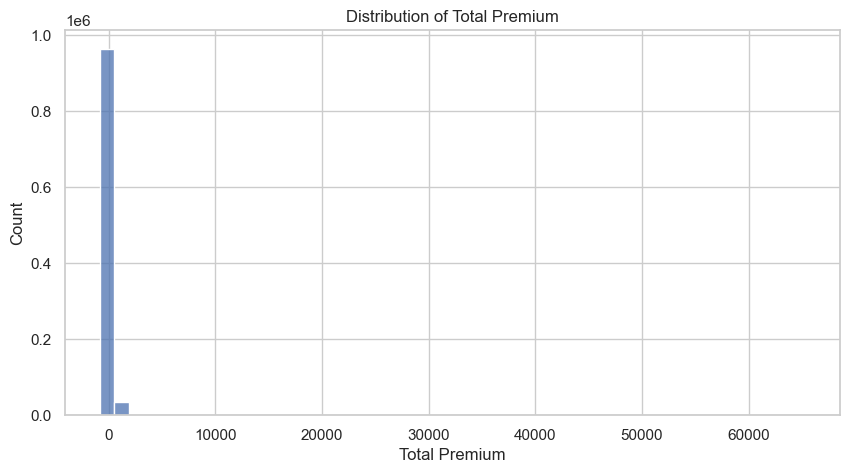

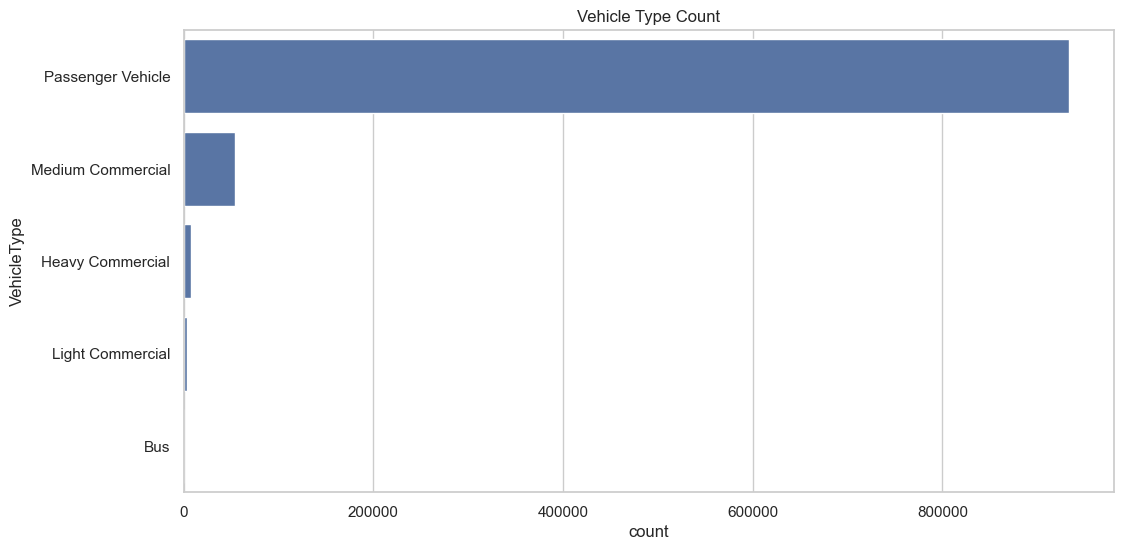

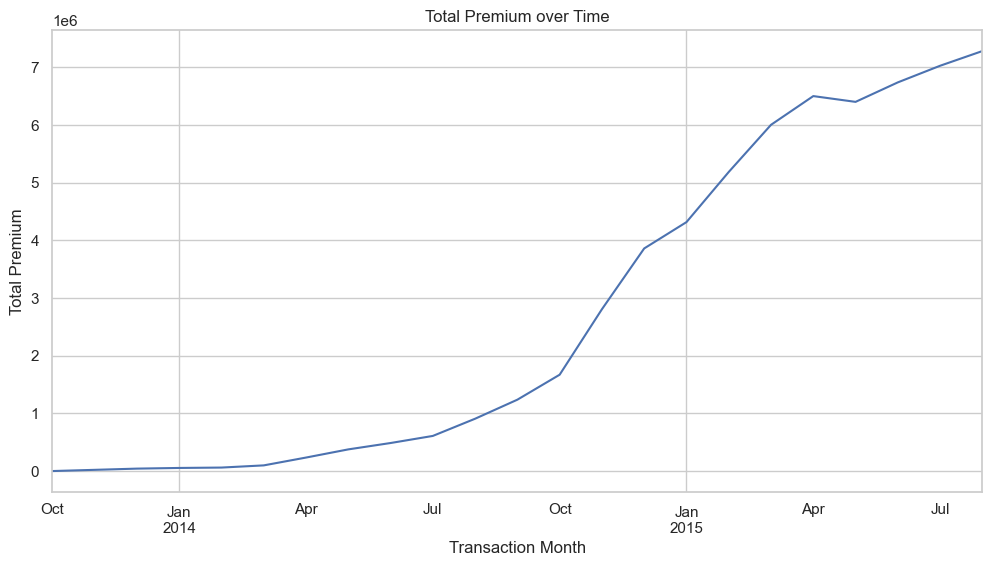

✅ Notebook ready for deeper analysis:
- Premium vs Claims analysis
- VehicleType vs Premium analysis
- Explore coverage categories and product types


In [4]:
# ===============================
# Insurance Week 3 - Dataset Analysis
# ===============================

# 1️⃣ Setup & Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)  # Show all columns

# 2️⃣ Load Dataset via Git LFS
file_path = "data/MachineLearningRating_v3/MachineLearningRating_v3.txt"

df = pd.read_csv(file_path, sep='|', low_memory=False)
print(f"Dataset shape: {df.shape}")
df.head()

# 3️⃣ Inspect Data
print(df.info())
print(df.describe(include='all'))

# Check for missing values
missing = df.isna().sum().sort_values(ascending=False)
print("Missing values per column:")
print(missing.head(10))

# 4️⃣ Data Cleaning & Type Conversion

# Convert TransactionMonth to datetime
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')

# Convert numeric columns
numeric_cols = ['TotalPremium', 'TotalClaims', 'CustomValueEstimate', 'CapitalOutstanding']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 5️⃣ Basic Summaries
print(df[numeric_cols].describe())

# 6️⃣ Visualizations

# Histogram of TotalPremium
plt.figure(figsize=(10,5))
sns.histplot(df['TotalPremium'].dropna(), bins=50)
plt.title('Distribution of Total Premium')
plt.xlabel('Total Premium')
plt.show()

# Count of Vehicle Types
plt.figure(figsize=(12,6))
sns.countplot(y='VehicleType', data=df, order=df['VehicleType'].value_counts().index)
plt.title('Vehicle Type Count')
plt.show()

# Sum of TotalPremium by Month
monthly_premium = df.groupby(df['TransactionMonth'].dt.to_period('M'))['TotalPremium'].sum()
monthly_premium.plot(kind='line', figsize=(12,6))
plt.title('Total Premium over Time')
plt.xlabel('Transaction Month')
plt.ylabel('Total Premium')
plt.show()

# 7️⃣ Insights / Next Steps
print("✅ Notebook ready for deeper analysis:")
print("- Premium vs Claims analysis")
print("- VehicleType vs Premium analysis")
print("- Explore coverage categories and product types")
